In [104]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)

2.6.0


In [105]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# Resize train images

In [106]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


# Load train images

In [107]:
import numpy as np

def load_data(img_path, number_of_data=300):
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


# Check first image

라벨:  0


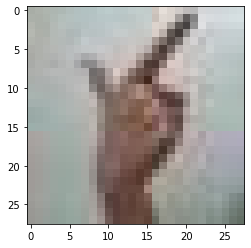

In [108]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# Make model

In [109]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28,28,3)))    #컬러이미지므로 r,g,b=3
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(50, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))    #0~2까지 총 3개의 클래스를 구분

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 30)        840       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 50)        13550     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 50)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1250)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 50)                62550     
_________________________________________________________________
dense_21 (Dense)             

# Teaching

In [110]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 40.3761 - accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 7.3779 - accuracy: 0.3467
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 2.8153 - accuracy: 0.4667
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.2253 - accuracy: 0.6200
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.7300
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8567
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9500
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0930 - accuracy: 0.9733
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0505 - accuracy: 0.9833
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 1.0000


# Resize test images

In [111]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
test_image_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(test_image_dir)

print("rock resize 완료!")

test_image_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(test_image_dir)

print("scissor resize 완료!")

test_image_dir = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(test_image_dir)

print("paper resize 완료!")



100  images to be resized.
100  images resized.
rock resize 완료!
100  images to be resized.
100  images resized.
scissor resize 완료!
100  images to be resized.
100  images resized.
paper resize 완료!


# Load test images

In [112]:
def load_test_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("시험데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(test_image_dir_path)
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

시험데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


# Testing

In [113]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.3201 - accuracy: 0.7167
test_loss: 1.320128321647644 
test_accuracy: 0.7166666388511658


# 회고
처음에 ‘테스트 데이터는 "앞으로 분류해야 하는 데이터"이므로, 인덱스를 비워두어야 한다’라고 생각해서 테스트 데이터에 label(0~2)을 지정하는 코드를 적지 않았는데, 알고 보니 테스트 데이터에서 label은 “정답”을 입력하는 것이었다.
그렇게 테스트 데이터에 입력한 정답 label과 학습시킨 딥러닝 모델이 분류한 label을 대조해 정확도를 판단하는 게 지금 작성한 코드의 메커니즘이라고 같은 조원인 혜지님이 친절하게 알려주셨다. 덕분에 코드도 고치고 이해도 확실히 했다.

그렇게 한고비를 넘어 코드를 전부 작성은 했는데, 이번에는 요구하는 정확도가 도저히 나오지 않아 문제였다.
여러 조원분에게 여쭤보니 resize할 때 크기를 28보다 크게 조정하기, keras.layers.Conv2D() 안의 값과 Dense() 안의 값, epoch 값을 크게 조정하기 등의 파훼법이 오갔는데, 퍼실님께서 "정확도 문제는 사진 자체에 문제가 있을 확률이 높다"라고 하셔서 조금 귀찮지만 사진을 새로 찍어 업로드하기로 마음먹었다.
사진 300장을 다시 찍어서 올리는 일이 은근 번거롭다고 생각했는데, 다음날 쉬는 시간에 조원들과 이야기를 나누어보니 가위, 바위, 보 각각 600장씩 1800장을 찍어 올린 분도 계셨다. 투지가 정말 대단하다고 생각했다.

각설하고, 사진을 교체했더니 0.3 정도 나오던 accuracy가 0.5 정도로 높아졌지만 여전히 0.6은 넘기지 못했다. 그래서 Conv2D의 값, Dense의 값, epoch 값의 숫자를 조금씩 조금씩 올려보았더니 드디어 0.6을 넘겼다. 그런데 어떤 때는 0.6을 웃돌아 0.85가 나오더니 언제는 밑돌아 0.51이 나오고, 또 언제는 0.69가 나오고 accuracy가 널뛰었다. 대략 10번중에 한두번은 0.4에서 0.5정도의 값이 자꾸 나와서 다른 조원들도 이런가 살펴보니 "그래서 (accuracy 0.6이 넘는 순간 테스트를)멈춰야해요..."라는 답변이 돌아왔다. 무엇이 accuracy 값의 진폭을 이렇게 만드는지 답답하다. 아마 돌고 돌아 결국은 사진의 문제가 아닐까 추측한다.

수학부터 코딩까지, 바닥부터 배워야 할 것이 많아 일단은 더 수정않고 넘기지만 나중에라도 명확한 해답을 얻었으면 좋겠다.